## 21-05-2020 

### Objectives
* Introduction to embedded methods 
* Advantages 
* Process 
* Introduction to hybreed methods 
* Advantages 
* Process 


### Introduction to Embedded Methods 
* Feature selection happens duriing the model training thats why its called Embedded methods 
##### Advantages 
* Feature Interaction with target is considerd 
* Fast like filter based methods 
* More accurate than filter based methods 
* Less prone to over fitting 


##### Process of applying Embedded methods 
* First these methods train the Ml model
* They them derive feature importence from the derived model
* And finaly remove non_importent features 


#### Methods
* Regularization based 
* Tree based 

### Regularization based
* Using regularization technique , the learned weights(w0,w1...)are thresholded so that the idividual impact on the prediction is reduced 
* By tapping down feature ,it makes sure that some specific feature don't become over importent 


In [1]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression

In [2]:
import pandas as pd
data = pd.DataFrame([[0,0,0],[0,0,.1],[1,1,1]], columns=['A','B','Y'])

C:\Users\saket\Anaconda333\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [3]:
data

,A,B,Y
0,0,0,0.0
1,0,0,0.1
2,1,1,1.0


In [4]:
lasso = Lasso(alpha=.1)

lasso.fit(data[['A','B']], data.Y)


Lasso(alpha=0.1)

In [5]:
lasso.coef_

array([0.5, 0. ])

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(data[['A','B']], data.Y)

LinearRegression()

In [8]:
lr.coef_

array([-1.47086948e+14,  1.47086948e+14])

* PS: Feature selection is happening as part of model training 
##### Penalty calculation needs to be understood 
 - L1 Regularization : Shrinks come of the coefs to zero thus suited for feature selection -Lasso
 - L2 Regularization : It does't set the weights to zero -Ridge 

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression(penalty='l1')

###### ps : this is how we achive feature selection in embedding method for Logistic regression

### Tree based feature importence 
* Tree based models like __Random Forests__
* Lets understand Random forest

<img src = "https://miro.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png">
<hr>

### Random Forest
* Base understanding ,Train empty trees with different subset of data ,and it will generate different trees 
* For doing the prediction (classification),all the partisipating trees predict.And majority decides the prediction 
* This composition of trees is known as Random Forests 

In [15]:
from sklearn.datasets import load_digits


C:\Users\saket\Anaconda333\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [16]:
digits = load_digits()

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

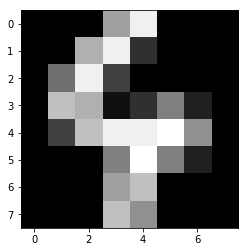

In [22]:
plt.imshow(digits.images[110], cmap='gray')

In [23]:
digits.data[110]

array([ 0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  3.,
        0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12.,
       11.,  1.,  3.,  8.,  2.,  0.,  0.,  4., 12., 15., 15., 16.,  9.,
        0.,  0.,  0.,  0.,  8., 16.,  8.,  2.,  0.,  0.,  0.,  0., 10.,
       12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.])

In [24]:
digits.target[110]


4

In [25]:
from sklearn.tree import DecisionTreeClassifier

C:\Users\saket\Anaconda333\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\Users\saket\Anaconda333\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [28]:
dt = DecisionTreeClassifier()

In [29]:
dt.fit(trainX, trainY)

DecisionTreeClassifier()

In [30]:
dt.score(testX, testY)

0.86

In [31]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\saket\Anaconda333\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [32]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [33]:
rf.fit(trainX,trainY)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [34]:
rf.score(testX,testY)

0.98

In [35]:
import numpy as np
np.round(rf.feature_importances_,2)

array([0.  , 0.  , 0.02, 0.01, 0.01, 0.02, 0.01, 0.  , 0.  , 0.01, 0.03,
       0.01, 0.02, 0.03, 0.01, 0.  , 0.  , 0.01, 0.02, 0.03, 0.03, 0.05,
       0.01, 0.  , 0.  , 0.01, 0.05, 0.02, 0.03, 0.02, 0.03, 0.  , 0.  ,
       0.03, 0.03, 0.02, 0.04, 0.02, 0.03, 0.  , 0.  , 0.01, 0.04, 0.04,
       0.02, 0.02, 0.02, 0.  , 0.  , 0.  , 0.02, 0.02, 0.01, 0.02, 0.03,
       0.  , 0.  , 0.  , 0.02, 0.01, 0.02, 0.03, 0.01, 0.  ])

### Introduction to Hybrid methods 
* Rather to use one method to do feature subset selection ,hybrid methods as the names combine different approches to get best possible feature subset
* It's like starting with filter based methods to remove the content of the similar data 
* Followed by using wrapper based methods

### Advantages :
* High accuracy models 
* Robust Models 

### Process:
* Using Filter and wrapper methods 
   - using f_classif choose some importent features (reduses the feature space )(100-75)
   - Using sequentialFeatureSelector get top featurres from selected oned (75-25)
* Using Embedded and wrapper methods 
   - Lasso for identifying the importent features of decision trees 
   - choosing top 50 features and applying wrapper methods

### A fancy way of naming the above things
* Reducing the feature dimensions using incremntal techniques


In [36]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv', sep=';')
def f(r):
    if r <= 3:
        return 1
    elif r<= 6:
        return 2
    else:
        return 3

df.quality = df.quality.map(f)

In [37]:
features = list(df.columns.values)

In [38]:
features.remove('quality')

In [39]:
dt = DecisionTreeClassifier()

In [40]:
dt.fit(df[features], df.quality)

DecisionTreeClassifier()

In [41]:
fi = pd.Series(dt.feature_importances_, index=features)

In [42]:
fi

fixed acidity           0.064177
volatile acidity        0.087072
citric acid             0.065442
residual sugar          0.094925
chlorides               0.083845
free sulfur dioxide     0.081218
total sulfur dioxide    0.065549
density                 0.100890
pH                      0.078342
sulphates               0.068853
alcohol                 0.209687
dtype: float64

In [43]:
top5 = list(fi.sort_values(ascending=False)[:5].index)

In [44]:
top5

['alcohol', 'density', 'residual sugar', 'volatile acidity', 'chlorides']

In [45]:
feature_data = df[top5]

In [46]:
rf = RandomForestClassifier(n_estimators=1000)

In [47]:
trainX, testX, trainY, testY = train_test_split(feature_data, df.quality)

In [48]:
rf.fit(trainX, trainY)

RandomForestClassifier(n_estimators=1000)

In [49]:
rf.score(testX, testY)


0.8628571428571429

### Some reading assignments
* Probability Basics & Conditional Probability
* https://developers.google.com/machine-learning/guides/good-data-analysis
* https://developers.google.com/machine-learning/guides/rules-of-ml